# Analysis of COVID dataset

In [2]:
import numpy as np
import pandas as pd

In [3]:
!ls data/

2019_nCoV_data.csv	    time_series_covid_19_confirmed.csv
covid_19_data.csv	    time_series_covid_19_deaths.csv
COVID19_line_list_data.csv  time_series_covid_19_recovered.csv
COVID19_open_line_list.csv


In [4]:
df=pd.read_csv("data/COVID19_open_line_list.csv")
df.head()

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,1.0,30,male,"Chaohu City, Hefei City",Anhui,China,1.0,31.646960,117.716600,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,47,male,"Baohe District, Hefei City",Anhui,China,1.0,31.778630,117.331900,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,49,male,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,47,female,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,50,female,"Feidong County, Hefei City",Anhui,China,1.0,32.001230,117.568100,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14126 entries, 0 to 14125
Data columns (total 45 columns):
ID                          13173 non-null float64
age                         1349 non-null object
sex                         1264 non-null object
city                        10194 non-null object
province                    12906 non-null object
country                     13148 non-null object
wuhan(0)_not_wuhan(1)       13170 non-null float64
latitude                    13147 non-null float64
longitude                   13147 non-null float64
geo_resolution              13147 non-null object
date_onset_symptoms         746 non-null object
date_admission_hospital     730 non-null object
date_confirmation           13089 non-null object
symptoms                    493 non-null object
lives_in_Wuhan              565 non-null object
travel_history_dates        503 non-null object
travel_history_location     758 non-null object
reported_market_exposure    35 non-null object
addi

In [6]:
features=["ID","age","sex","city","province","country"]
df1=df[features]
df1.head()

,ID,age,sex,city,province,country
0,1.0,30,male,"Chaohu City, Hefei City",Anhui,China
1,2.0,47,male,"Baohe District, Hefei City",Anhui,China
2,3.0,49,male,"High-Tech Zone, Hefei City",Anhui,China
3,4.0,47,female,"High-Tech Zone, Hefei City",Anhui,China
4,5.0,50,female,"Feidong County, Hefei City",Anhui,China


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14126 entries, 0 to 14125
Data columns (total 6 columns):
ID          13173 non-null float64
age         1349 non-null object
sex         1264 non-null object
city        10194 non-null object
province    12906 non-null object
country     13148 non-null object
dtypes: float64(1), object(5)
memory usage: 662.2+ KB


In [ ]:
type(df1)

In [8]:
df2=df1.dropna()
df2.head()

,ID,age,sex,city,province,country
0,1.0,30,male,"Chaohu City, Hefei City",Anhui,China
1,2.0,47,male,"Baohe District, Hefei City",Anhui,China
2,3.0,49,male,"High-Tech Zone, Hefei City",Anhui,China
3,4.0,47,female,"High-Tech Zone, Hefei City",Anhui,China
4,5.0,50,female,"Feidong County, Hefei City",Anhui,China


In [9]:
df2.groupby(["country","province"])["ID"].count()

country        province                        
Australia      New South Wales                       4
               Queensland                            5
               Victoria                              4
Cambodia       Sihanoukville                         1
Canada         British Columbia                      7
               Ontario                               3
China          Anhui                                91
               Beijing                              32
               Chongqing                             1
               Fujian                                4
               Gansu                                72
               Guangdong                            12
               Guangxi                              35
               Guizhou                              57
               Hainan                               18
               Hebei                                 2
               Heilongjiang                          2
               He

In [10]:
df2.groupby("sex")["ID"].count()

sex
Female      3
Male        4
female    399
male      502
Name: ID, dtype: int64

In [11]:
df2["sex"].unique()

array(['male', 'female', 'Female', 'Male'], dtype=object)

In [12]:
df2[df2["sex"]=="Female"]

,ID,age,sex,city,province,country
12232,12538.0,21,Female,Hong Kong,Hong Kong,China
12237,12543.0,55,Female,Hong Kong,Hong Kong,China
12239,12545.0,60,Female,Hong Kong,Hong Kong,China


In [13]:
df2[df2["sex"]=="Female"]["sex"]

12232    Female
12237    Female
12239    Female
Name: sex, dtype: object

In [14]:
df2.loc[df2.sex=="Female",:]

,ID,age,sex,city,province,country
12232,12538.0,21,Female,Hong Kong,Hong Kong,China
12237,12543.0,55,Female,Hong Kong,Hong Kong,China
12239,12545.0,60,Female,Hong Kong,Hong Kong,China


In [15]:
df2.loc[df2.sex=="Female","sex"]

12232    Female
12237    Female
12239    Female
Name: sex, dtype: object

In [16]:
df2["sex"].replace({"Male": "male", "Female": "female"},inplace=True)

/home/bharath/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [17]:
df2["sex"].unique()

array(['male', 'female'], dtype=object)

In [18]:
df2.pivot_table(values="ID",index=["country","province"],columns="sex")

sex                                                   female          male
country       province                                                    
Australia     New South Wales                    1086.000000    674.000000
              Queensland                         4777.000000   4921.666667
              Victoria                           3919.500000   1635.000000
Cambodia      Sihanoukville                              NaN   1087.000000
Canada        British Columbia                   9948.500000   7770.333333
              Ontario                            3168.000000    683.000000
China         Anhui                              2676.421053   1736.811321
              Beijing                            3692.187500   3387.937500
              Chongqing                            56.000000           NaN
              Fujian                               80.000000     81.500000
              Gansu                              7888.600000   7461.593750
              Guangdong                           904.000000    102.400000
              Guangxi                            4440.800000   4171.500000
              Guizhou                            6615.464286   6823.379310
              Hainan                             5573.333333   6351.777778
              Hebei                                      NaN    173.500000
              Heilongjiang                               NaN    175.500000
              Henan                               186.750000    184.800000
              Hong Kong                          6804.312500   6388.476190
              Hunan                               198.000000    200.000000
              Inner Mongolia                     7039.000000   4803.750000
              Jiangsu                           12018.500000    222.000000
              Jiangxi                             557.750000    740.375000
              Jilin                              8120.703704   8533.080000
              Liaoning                            254.000000    253.333333
              Macau                               257.000000    256.000000
              Ningxia                                    NaN    258.500000
              Qinghai                            4383.000000   2832.222222
              Shaanxi                            5002.673913   4600.032258
              Shandong                            266.000000    266.000000
...                                                      ...           ...
Japan         Chiba Prefecture                  11697.500000  11547.000000
              Hokkaido                          12420.666667  12535.200000
              Kanagawa                          13459.000000  13460.000000
              Kanagawa Prefecture               11809.000000  11614.000000
              Kumamoto                          11537.000000  11538.000000
              Shizuoka                                   NaN  13461.000000
              Tokyo                              2970.000000   6737.500000
              Wakayama Prefecture               10927.000000  11054.166667
Lebanon       Beirut                            11539.000000  12601.000000
Malaysia      Johor                              4872.000000           NaN
              Kedah                                      NaN  11307.000000
              Wilayah Persekutuan Kuala Lumpur   7739.666667   2478.666667
Pakistan      Sindh                                      NaN  12088.000000
Philippines   Cebu                               6352.000000           NaN
              National Capital Region (NCR)      2961.000000   4870.000000
Romania       Gorj                                       NaN  12113.000000
South Korea   Busan                             12028.500000           NaN
              Gyeonggi                           7045.000000   4350.000000
              Seoul                              7969.000000   5361.400000
Spain         Andalusia                                  NaN  12051.000000
Thailand      Bangkok Met

In [19]:
df2.pivot_table(values="ID",index="country",columns="sex")

sex,female,male
country,,
Australia,3695.800000,2507.125000
Cambodia,NaN,1087.000000
Canada,7688.333333,5998.500000
China,5293.324841,4459.840108
Finland,7321.000000,NaN
France,6374.000000,7368.857143
Germany,1882.000000,5990.875000
Greece,12089.000000,NaN
Italy,12428.200000,12108.666667


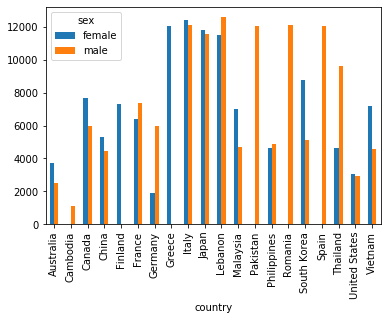

In [21]:
import matplotlib.pyplot as plt
df2.pivot_table(values="ID",index="country",columns="sex").plot(kind="bar")
plt.show()

In [ ]:
!pwd